In [349]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [350]:
df1 = pd.read_csv('Doceree-HCP_Train.csv'  ,encoding='latin1')


In [351]:
df1.shape

(113937, 14)

In [352]:
df1.columns

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL', 'KEYWORDS', 'TAXONOMY', 'IS_HCP'],
      dtype='object')

In [353]:
df1.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [354]:
cnt = 0;
for i in df1.IS_HCP:
    if(i == 1):
        cnt = cnt+1
print(cnt)
print(len(df1.IS_HCP)-cnt)

34180
79757


#Data Exploration

In [355]:
df2 = df1[['KEYWORDS', 'IS_HCP']]
df3 = df1[['KEYWORDS', 'IS_HCP', 'TAXONOMY']]

In [356]:
print(df2.isna().sum())

KEYWORDS    0
IS_HCP      1
dtype: int64


In [357]:
df2.dropna(inplace = True)

<ipython-input-357-6c3633892e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True)


In [358]:
x = df2["KEYWORDS"]
y = df2["IS_HCP"]

In [359]:
print(df3.isna().sum())
df3.dropna(inplace = True)

KEYWORDS        0
IS_HCP          1
TAXONOMY    81624
dtype: int64


<ipython-input-359-827dde9768d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace = True)


In [360]:
print(df3.shape)

(32313, 3)


#SPLITING DATA FOR IS_HCP

In [361]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [362]:
print(x_train.shape)
print(x_val.shape)

(102542,)
(11394,)


In [363]:
def append_string_to_list(ls, my_string):
    ls.append(my_string)
    return ls

In [364]:
train_list = []
for i in x_train:
  append_string_to_list(train_list,i.lower())


In [365]:
test_list = []
for i in x_val:
  append_string_to_list(test_list,i.lower())

In [366]:
print(len(train_list))
print(train_list[0])

102542
small|immunoglobulin g|nephrology|immunoglobulin m|radiology|preventive medicine|critical care|internal medicine|oncology|abscess|dissection|forensic medicine|general|specialties|pneumonia|conduction|protozoan infections|hand|trauma|pain|escherichia coli|disease|hepatitis c|tuberculosis|health|pain management|acos|hepatitis|cardiology|preventive|nausea|the|clinical|hematology|proton therapy|nervous system|dermatology|dietetics|transplantation|pediatrics|urology|diabetes|cardiac|surgery|


#  MODEL FOR IS_HCP

In [367]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [368]:
vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [369]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_list)
word_index = tokenizer.word_index
train_seq = tokenizer.texts_to_sequences(train_list)
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [370]:
print(train_padded)

[[ 19 244 317 ...   0   0   0]
 [ 85  63 381 ...   0   0   0]
 [296 291 157 ...   0   0   0]
 ...
 [  6 222  47 ...   0   0   0]
 [ 24   4  14 ...   0   0   0]
 [  6   2  22 ...   0   0   0]]


In [371]:
test_seq = tokenizer.texts_to_sequences(test_list)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(test_padded)

[[ 22 256  33 ...   0   0   0]
 [  3  57  11 ...   0   0   0]
 [ 21  13  54 ...   0   0   0]
 ...
 [ 80 141  34 ...   0   0   0]
 [ 14  13 272 ...   0   0   0]
 [ 34   5   7 ...   0   0   0]]


In [372]:
training_labels = np.array(y_train)
testing_labels = np.array(y_val)

In [373]:
import tensorflow as tf

# Parameters
embedding_dim = 16
dense_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 120, 16)           160000    
                                                                 
 flatten_10 (Flatten)        (None, 1920)              0         
                                                                 
 dense_26 (Dense)            (None, 16)                30736     
                                                                 
 dense_27 (Dense)            (None, 32)                544       
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 191,313
Trainable params: 191,313
Non-trainable params: 0
_________________________________________________________________


In [374]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(test_padded, testing_labels))

Epoch 1/10
3205/3205 [==============================] - 47s 14ms/step - loss: 0.0741 - accuracy: 0.9714 - val_loss: 0.0209 - val_accuracy: 0.9935
Epoch 2/10
3205/3205 [==============================] - 18s 6ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0171 - val_accuracy: 0.9956
Epoch 3/10
3205/3205 [==============================] - 17s 5ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0148 - val_accuracy: 0.9964
Epoch 4/10
3205/3205 [==============================] - 18s 5ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0144 - val_accuracy: 0.9959
Epoch 5/10
3205/3205 [==============================] - 16s 5ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0124 - val_accuracy: 0.9963
Epoch 6/10
3205/3205 [==============================] - 17s 5ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0119 - val_accuracy: 0.9964
Epoch 7/10
3205/3205 [==============================] - 16s 5ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0121 - val_a

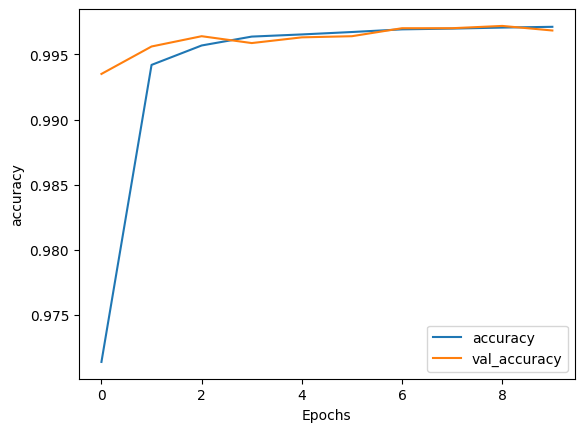

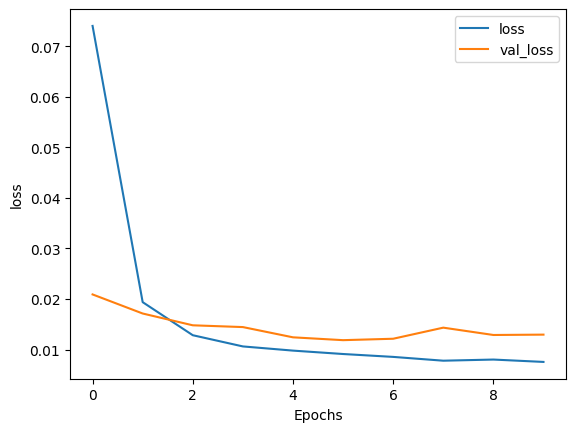

In [375]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#MODEL TAXINOMINATION


In [376]:
df3.head()

,KEYWORDS,IS_HCP,TAXONOMY
3,Dental|Total|Clinical|Pharmacology|Physicians|...,1.0,2084P0800X
8,Intensive Care|Shock|Ischemic Heart Disease|He...,1.0,2084P0804X
21,Gastrointestinal Tract|Female|Oncology|Medicin...,1.0,2084N0400X
29,Rehabilitation|Transplantation|Clinical|Preven...,1.0,2084V0102X
35,Dermatomyositis|Preventive|Male|Dermatology|Ag...,1.0,207RC0000X


In [377]:
df3.isna().sum()

KEYWORDS    0
IS_HCP      0
TAXONOMY    0
dtype: int64

In [378]:
df3.dropna(inplace = True)

<ipython-input-378-3e9cd46e1d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace = True)


In [379]:
df3.shape

(32313, 3)

In [380]:
taxo = df3['TAXONOMY']
taxo

3         2084P0800X
8         2084P0804X
21        2084N0400X
29        2084V0102X
35        207RC0000X
             ...    
113932    207RP1001X
113933    2084P0800X
113934    208000000X
113935    2084P0800X
113936    2084P0800X
Name: TAXONOMY, Length: 32313, dtype: object

In [381]:
taxo_list = []
for i in taxo:
  append_string_to_list(taxo_list,i.lower())

In [382]:
len(taxo_list)

32313

In [383]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(taxo_list)
taxo_index = tokenizer.word_index
taxo_seq = tokenizer.texts_to_sequences(taxo_list)
taxo_padded = pad_sequences(taxo_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [384]:
print(taxo_index)

{'2084p0800x': 1, '2084n0400x': 2, '207q00000x': 3, '207r00000x': 4, '208000000x': 5, '207rg0100x': 6, '2084p0804x': 7, '2084n0402x': 8, '207t00000x': 9, '2084n0600x': 10, '207n00000x': 11, '207rh0003x': 12, '207rc0000x': 13, '207w00000x': 14, '207rp1001x': 15, '363lf0000x': 16, '2085r0001x': 17, '208d00000x': 18, '174400000x': 19, '390200000x': 20, '207p00000x': 21, '363a00000x': 22, '207rg0300x': 23, '207v00000x': 24, '207ri0011x': 25, '207rr0500x': 26, '2084v0102x': 27, '2084p0805x': 28, '207re0101x': 29, '363lp0808x': 30, '207zp0105x': 31, '2084s0012x': 32, '207rc0200x': 33, '208m00000x': 34, '363l00000x': 35, '207l00000x': 36, '2084p0802x': 37, '207ri0200x': 38, '363am0700x': 39, '207rx0202x': 40, '2084a0401x': 41, '2084f0202x': 42, '2080p0207x': 43, '2080p0008x': 44, '208100000x': 45, '2084p2900x': 46, '207qg0300x': 47, '204d00000x': 48, '363la2200x': 49, '2085r0202x': 50, '207rn0300x': 51, '207k00000x': 52, '2084p0015x': 53, '207rs0012x': 54, '2084n0008x': 55, '207x00000x': 56, 

In [385]:
print(len(taxo_index))
type(taxo_index)

207


dict

In [386]:
tax_num = []
for i in df3["TAXONOMY"]:
    tax_num.append(taxo_index[i.lower()])

In [387]:
print(len(tax_num))

32313


In [388]:
df3.insert(loc=2, column='tax_num', value = tax_num)

In [389]:
df3.head()

,KEYWORDS,IS_HCP,tax_num,TAXONOMY
3,Dental|Total|Clinical|Pharmacology|Physicians|...,1.0,1,2084P0800X
8,Intensive Care|Shock|Ischemic Heart Disease|He...,1.0,7,2084P0804X
21,Gastrointestinal Tract|Female|Oncology|Medicin...,1.0,2,2084N0400X
29,Rehabilitation|Transplantation|Clinical|Preven...,1.0,27,2084V0102X
35,Dermatomyositis|Preventive|Male|Dermatology|Ag...,1.0,13,207RC0000X


In [390]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3["std_tax_num"] = scaler.fit_transform(df3[["tax_num"]])


<ipython-input-390-7037f93880b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["std_tax_num"] = scaler.fit_transform(df3[["tax_num"]])


In [391]:
df3.head()

,KEYWORDS,IS_HCP,tax_num,TAXONOMY,std_tax_num
3,Dental|Total|Clinical|Pharmacology|Physicians|...,1.0,1,2084P0800X,-0.457075
8,Intensive Care|Shock|Ischemic Heart Disease|He...,1.0,7,2084P0804X,-0.147795
21,Gastrointestinal Tract|Female|Oncology|Medicin...,1.0,2,2084N0400X,-0.405528
29,Rehabilitation|Transplantation|Clinical|Preven...,1.0,27,2084V0102X,0.883138
35,Dermatomyositis|Preventive|Male|Dermatology|Ag...,1.0,13,207RC0000X,0.161485


In [392]:
x_taxo = df3["KEYWORDS"]

In [393]:
x_taxo_list = []
for i in x_taxo:
    x_taxo_list.append(i.lower())

In [394]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(taxo_list)
word_index = tokenizer.word_index
taxo_seq = tokenizer.texts_to_sequences(taxo_list)
taxo_padded = pad_sequences(taxo_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [395]:
print(taxo_padded)

[[1 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [396]:
y_taxo = df3["tax_num"]

In [397]:
from sklearn.model_selection import train_test_split
xtaxo_train, xtaxo_val, ytaxo_train, ytaxo_val = train_test_split(taxo_padded, y_taxo, test_size=0.2, random_state=42)

In [398]:
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_log_error
model_taxo = XGBRFRegressor()

# Train the model
model_taxo.fit(xtaxo_train,ytaxo_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [399]:
y_pred_val = model_taxo.predict(xtaxo_val)
for i in range(len(y_pred_val)):
      y_pred_val[i] = int(y_pred_val[i])

In [400]:
rmsle = np.sqrt(mean_squared_log_error(ytaxo_val, y_pred_val))
print(f"Validation RMSLE: {rmsle}")

Validation RMSLE: 0.5382211260229162


# PREDICT RESULT

In [401]:
predict_df = pd.read_csv('Doceree-HCP_Test.csv')
predict_df.shape

(28493, 12)

In [402]:
predict_df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


In [403]:
type(predict_df)

pandas.core.frame.DataFrame

In [404]:
x_pred  = predict_df["KEYWORDS"]

type(x_pred)

pandas.core.series.Series

In [405]:
x_pred_list = []
for i in x_pred:
    x_pred_list.append(i)

In [406]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_pred_list)
word_index = tokenizer.word_index
pred_seq = tokenizer.texts_to_sequences(x_pred_list)
pred_padded = pad_sequences(pred_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [407]:
isHCP_pred = model.predict(pred_padded)

891/891 [==============================] - 2s 2ms/step


In [408]:
len(isHCP_pred)

28493

In [409]:
isHCP_pred[3434]

array([3.5686792e-08], dtype=float32)

In [410]:
for i in range(len(isHCP_pred)):
      isHCP_pred[i] = int(isHCP_pred[i])


In [411]:
sol_df = predict_df[["ID","KEYWORDS"]]
type(sol_df)

pandas.core.frame.DataFrame

In [412]:
sol_df.head()

,ID,KEYWORDS
0,115501,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,chronic kidney disease|pain|nephrology|disease...


In [413]:
sol_df.insert(loc=2, column='IS_HCF', value = isHCP_pred)

In [414]:
sol_df.head()

,ID,KEYWORDS,IS_HCF
0,115501,Family Practice|Drainage|Clinical|Dermatology|...,0.0
1,115502,General|Clinical|Operative|Medicine|Cardiology...,0.0
2,115503,Abortion|Anxiety Disorders|Apnea|False|Trauma|...,0.0
3,115504,Health|Male|Neurological Surgery|Otolaryngolog...,0.0
4,115505,chronic kidney disease|pain|nephrology|disease...,0.0


In [415]:
ones_df = sol_df[sol_df['IS_HCF'] == 1]
zeros_df = sol_df[sol_df['IS_HCF'] == 0]

In [416]:
ones_df.head()

,ID,KEYWORDS,IS_HCF
31,115532,Anemia|Delivery|Oncology|Medicine|Diabetes Mel...,1.0
49,115550,Surgical|Pathology|Heart Failure|Physicians|Sp...,1.0
62,115563,Surgical|Pathology|Heart Failure|Physicians|Sp...,1.0
65,115566,Clinical|Pediatrics|Rheumatology|Urology|Child...,1.0
75,115576,Pharmacology|Delivery|Medicine|Hospitals|Aged|...,1.0


In [417]:
ones_df.shape

(2715, 3)

In [418]:
x_pred_taxo = ones_df['KEYWORDS']

In [419]:
x_pred_taxo_list = []
for i in x_pred_taxo:
      x_pred_taxo_list.append(i.lower())

In [420]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_pred_taxo_list)
word_index = tokenizer.word_index
x_pred_taxo_seq = tokenizer.texts_to_sequences(x_pred_taxo_list)
x_pred_taxo_padded = pad_sequences(x_pred_taxo_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [421]:
y_taxo_pred = model_taxo.predict(x_pred_taxo_padded)

In [422]:
type(y_taxo_pred)

numpy.ndarray

In [423]:
for i in range(len(y_taxo_pred)):
    y_taxo_pred[i] = round(y_taxo_pred[i])

In [424]:
reversed_taxo_index = {value: key for key, value in taxo_index.items()}
reversed_taxo_index [1]

'2084p0800x'

In [425]:
taxo = []
for i in y_taxo_pred:
    taxo.append(reversed_taxo_index[i].upper())

In [426]:
ones_df.shape

(2715, 3)

In [427]:
ones_df.insert(loc=2, column='TAXONOMY', value = taxo)

In [428]:
ones_df.head()

,ID,KEYWORDS,TAXONOMY,IS_HCF
31,115532,Anemia|Delivery|Oncology|Medicine|Diabetes Mel...,204C00000X,1.0
49,115550,Surgical|Pathology|Heart Failure|Physicians|Sp...,2080P0207X,1.0
62,115563,Surgical|Pathology|Heart Failure|Physicians|Sp...,2080P0207X,1.0
65,115566,Clinical|Pediatrics|Rheumatology|Urology|Child...,208000000X,1.0
75,115576,Pharmacology|Delivery|Medicine|Hospitals|Aged|...,2080P0202X,1.0


In [429]:
zeros_df.head()

,ID,KEYWORDS,IS_HCF
0,115501,Family Practice|Drainage|Clinical|Dermatology|...,0.0
1,115502,General|Clinical|Operative|Medicine|Cardiology...,0.0
2,115503,Abortion|Anxiety Disorders|Apnea|False|Trauma|...,0.0
3,115504,Health|Male|Neurological Surgery|Otolaryngolog...,0.0
4,115505,chronic kidney disease|pain|nephrology|disease...,0.0


In [430]:
zeros_df['TAXONOMY'] = ""

<ipython-input-430-5ed7418a9b6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeros_df['TAXONOMY'] = ""


In [431]:
zeros_df.head()

,ID,KEYWORDS,IS_HCF,TAXONOMY
0,115501,Family Practice|Drainage|Clinical|Dermatology|...,0.0,
1,115502,General|Clinical|Operative|Medicine|Cardiology...,0.0,
2,115503,Abortion|Anxiety Disorders|Apnea|False|Trauma|...,0.0,
3,115504,Health|Male|Neurological Surgery|Otolaryngolog...,0.0,
4,115505,chronic kidney disease|pain|nephrology|disease...,0.0,


In [432]:
print(ones_df.shape)
print(zeros_df.shape)

(2715, 4)
(25778, 4)


In [433]:
combined_df = pd.concat([ones_df, zeros_df], ignore_index=True)

In [434]:
combined_df.shape

(28493, 4)

In [435]:
combined_df.head()

,ID,KEYWORDS,TAXONOMY,IS_HCF
0,115532,Anemia|Delivery|Oncology|Medicine|Diabetes Mel...,204C00000X,1.0
1,115550,Surgical|Pathology|Heart Failure|Physicians|Sp...,2080P0207X,1.0
2,115563,Surgical|Pathology|Heart Failure|Physicians|Sp...,2080P0207X,1.0
3,115566,Clinical|Pediatrics|Rheumatology|Urology|Child...,208000000X,1.0
4,115576,Pharmacology|Delivery|Medicine|Hospitals|Aged|...,2080P0202X,1.0


In [436]:
sorted_df = combined_df.sort_values('ID')

In [437]:
sorted_df.head()

,ID,KEYWORDS,TAXONOMY,IS_HCF
2715,115501,Family Practice|Drainage|Clinical|Dermatology|...,,0.0
2716,115502,General|Clinical|Operative|Medicine|Cardiology...,,0.0
2717,115503,Abortion|Anxiety Disorders|Apnea|False|Trauma|...,,0.0
2718,115504,Health|Male|Neurological Surgery|Otolaryngolog...,,0.0
2719,115505,chronic kidney disease|pain|nephrology|disease...,,0.0


In [438]:
sorted_df.tail()

,ID,KEYWORDS,TAXONOMY,IS_HCF
28488,143989,Transplantation|Psychiatry|Heart Failure|Angio...,,0.0
28489,143990,small|hospitals|nephrology|emergency medicine|...,,0.0
28490,143991,small|hospitals|nephrology|emergency medicine|...,,0.0
28491,143992,the|disease|pain|radiology|lung abscess|dyspar...,,0.0
28492,143993,Medicine|General|Clinical|False|Urology|Total|...,,0.0


In [439]:
sorted_df.to_csv("solution_doceree.csv",index = False)